## Lead Scoring Case Study: 

### Project Team: Viral Shah, Vineela, Vinoth


#### ::::: Problem Statement ::::: 
The company named X Education require a model wherein they wants to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score has a lower conversion chance. The target lead conversion rate has been agreed to be around 80%.

#### ::::: Goals of the Case Study :::::
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 
#### ::::: Evaluation Rubric :::::
Data Quality Checks Performed

Dummy Variables Created

Feature Engineering, if required

Clean Analytical Dataset

Tuning model parameters

Correct variable selection technique

Model Evaluation

Model explained properly

Commented code to include brief explanantion of important variables and the model in simple terms

In [108]:
## Importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm

from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_curve


In [2]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [3]:
# Creating a data frame from the CSV data
leads = pd.read_csv(r'Leads.csv')

In [4]:
# Checking the first few rows of the data
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the shape
leads.shape

(9240, 37)

In [6]:
# Checking the data type and missing values of the data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Performing data Analysis
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Checking on the data shape, we got to know that the data is of (9240 rows, and 37 columns)

There are good amount of Null or missing values in few of the critical columns in the data. We need to work on those varibales either by imputing the values or by removing those lines if they don't serve a desired purpose or don't affect much to our analysis.

#### Variables Identification

##### Unique Variables
<b>Prospect ID</b>	A unique ID with which the customer is identified.

<b>Lead Number</b>	A lead number assigned to each lead procured.

##### Categoricial Variable
<b>Lead Quality</b> Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.

In [8]:
# Creating a duplicate of the dataset
df = leads.copy(deep=True)

In [9]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Addressing this condition of the case study, problem statement:Many of the categorical variables have a 
# level called 'Select' which needs to be handled because it is as good as a null value (think why?).

selectVariable = ['Specialization', 'How did you hear about X Education', 'Lead Profile','City']

leads[selectVariable]

,Specialization,How did you hear about X Education,Lead Profile,City
0,Select,Select,Select,Select
1,Select,Select,Select,Select
2,Business Administration,Select,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,Select,Mumbai
4,Select,Other,Select,Mumbai
...,...,...,...,...
9235,IT Projects Management,Select,Potential Lead,Mumbai
9236,Media and Advertising,Select,Potential Lead,Mumbai
9237,Business Administration,Select,Potential Lead,Mumbai
9238,Human Resource Management,Online Search,NaN,Other Metro Cities


In [11]:
# Writing a function to address all the 'Select issues'
def select_map(x):
    return x.map({'Select': " "})

# Applying the function to the Leads data
df[selectVariable] = leads[selectVariable].apply(select_map)

In [12]:
# Identifying the Null or Missing values
missingpercentage = (df.isnull().sum() / len(df)) * 100

# Making a dataframe with the missing values % and columns into a dataframe (on account of large number of rows) 
missingpercentageDf = pd.DataFrame({'Column Name': df.columns,
                                 'Percent of data missing': missingpercentage})

In [13]:
missingpercentageDf

,Column Name,Percent of data missing
Prospect ID,Prospect ID,0.000000
Lead Number,Lead Number,0.000000
Lead Origin,Lead Origin,0.000000
Lead Source,Lead Source,0.389610
Do Not Email,Do Not Email,0.000000
Do Not Call,Do Not Call,0.000000
Converted,Converted,0.000000
TotalVisits,TotalVisits,1.482684
Total Time Spent on Website,Total Time Spent on Website,0.000000
Page Views Per Visit,Page Views Per Visit,1.482684


#### Addressing the missing values and also dropping variables, that may not be needed or redudent for our analysis

In [14]:
# Imputing the missing values with median
df=df.fillna(df.median())

In [15]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,,,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,,,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,,,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,,,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,NaN,,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,NaN,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,,NaN,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,,NaN,02.Medium,01.High,15.0,18.0,No,No,Modified


In [16]:
# dropping columns which has more missing values. approx around 25%
df = df.drop(['Country', 'How did you hear about X Education', 'What is your current occupation',\
         'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City',\
         'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',\
         'Asymmetrique Profile Score', 'Specialization'], axis = 1)

In [17]:
df = df.drop(['I agree to pay the amount through cheque', 'Magazine', 'Receive More Updates About Our Courses',\
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',\
              'A free copy of Mastering The Interview'], axis = 1)

In [18]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,Modified


In [19]:
df.shape

(9240, 18)

The colums/variables had been reduced from 37 to 18. 

#### Identifying and working on outlier

In [20]:
# addressing numaric variables
numericsVariables = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = leads.select_dtypes(include=numericsVariables)

In [21]:
df_num.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0,0,0.0,15.0,15.0
1,660728,0,5.0,674,2.5,15.0,15.0
2,660727,1,2.0,1532,2.0,14.0,20.0
3,660719,0,1.0,305,1.0,13.0,17.0
4,660681,1,2.0,1428,1.0,15.0,18.0


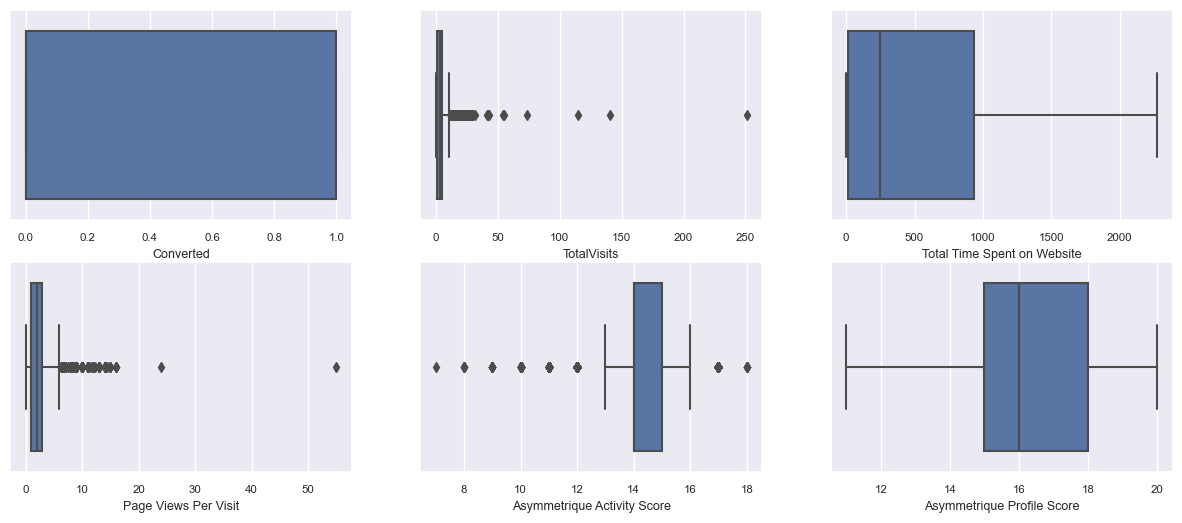

In [22]:
# Plotting the numarical or continuous data to understand the outliers
plt.figure(figsize=(15, 6))
sns.set(font_scale=.75)
plt.subplot(2,3,1)
sns.boxplot(x = 'Converted', data = df_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'TotalVisits', data = df_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'Total Time Spent on Website', data = df_num)
plt.subplot(2,3,4)
sns.boxplot(x = 'Page Views Per Visit', data = df_num)
plt.subplot(2,3,5)
sns.boxplot(x = 'Asymmetrique Activity Score', data = df_num)
plt.subplot(2,3,6)
sns.boxplot(x = 'Asymmetrique Profile Score', data = df_num)
plt.show()

In [23]:
# Identifying the Null or Missing values
missingpercentage = (df.isnull().sum() / len(df)) * 100

# Making a dataframe with the missing values % and columns into a dataframe (on account of large number of rows) 
missingpercentageDf = pd.DataFrame({'Column Name': df.columns,
                                 'Percent of data missing': missingpercentage})

In [24]:
missingpercentageDf

,Column Name,Percent of data missing
Prospect ID,Prospect ID,0.000000
Lead Number,Lead Number,0.000000
Lead Origin,Lead Origin,0.000000
Lead Source,Lead Source,0.389610
Do Not Email,Do Not Email,0.000000
Do Not Call,Do Not Call,0.000000
Converted,Converted,0.000000
TotalVisits,TotalVisits,0.000000
Total Time Spent on Website,Total Time Spent on Website,0.000000
Page Views Per Visit,Page Views Per Visit,0.000000


We have removed or adjusted the variables which has around 25% of missing values. 

#### Mapping and building dummies

In [25]:
# List of categorical variables to map
catVarList =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',\
                 'Digital Advertisement', 'Through Recommendations']

# Defining the map function to address binary values
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the categorical variable list
df[catVarList] = df[catVarList].apply(binary_map)

For our analysis we have converted the above column's values to binary value.

list of variables that we have address are 'Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations'

In [26]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,Modified


### creating dummy variables


In [27]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyVar = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], 
                                drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummyVar], axis=1)

In [28]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
# as we have dummies now, we can drop the below columns for the dataset
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity', 'Lead Number'], axis = 1)


In [30]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [31]:
df.shape

(9240, 68)

In [32]:
#pushing the 'converted' columns to the last of the column list
converted = df.pop('Converted')

df = pd.concat([df,converted], axis=1)

In [33]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [34]:
df.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Converted
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,3.438636,487.698268,2.357440,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.528788,0.077706,0.005952,0.000108,0.275216,0.005952,0.310390,0.000216,0.000108,0.189935,0.124892,0.000108,0.000216,0.057792,0.013528,0.000216,0.000108,0.015368,0.000649,0.000108,0.000541,0.000108,0.000108,0.000108,0.046320,0.035281,0.028896,0.000216,0.371970,0.000216,0.012554,0.003247,0.105303,0.069264,0.000108,0.297078,0.010065,0.006602,0.000649,0.000108,0.006494,0.018723,0.000216,0.305952,0.000108,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108,0.385390
std,0.270435,0.014711,4.819024,548.021466,2.145781,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.499198,0.267722,0.076926,0.010403,0.446647,0.076926,0.462678,0.014711,0.010403,0.392271,0.330614,0.010403,0.014711,0.233363,0.115527,0.014711,0.010403,0.123018,0.025475,0.010403,0.023257,0.010403,0.010403,0.010403,0.210189,0.184500,0.167524,0.014711,0.483357,0.014711,0.111346,0.056891,0.306960,0.253916,0.010403,0.456996,0.099823,0.080987,0.025475,0.010403,0.080325,0.135552,0.014711,0.460835,0.010403,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403,0.486714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Prospect ID                                         9240 non-null   object 
 1   Do Not Email                                        9240 non-null   int64  
 2   Do Not Call                                         9240 non-null   int64  
 3   TotalVisits                                         9240 non-null   float64
 4   Total Time Spent on Website                         9240 non-null   int64  
 5   Page Views Per Visit                                9240 non-null   float64
 6   Search                                              9240 non-null   int64  
 7   Newspaper Article                                   9240 non-null   int64  
 8   X Education Forums                                  9240 non-null   int64  
 9

#### Correlation Check:

In [36]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [156]:
# identifying numaric variables
numericsVariables = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
df_num = df.select_dtypes(include=numericsVariables)

# Plotting the correlation matrix
corrmat = np.corrcoef(df_num.transpose())
corrmat.shape

# plotting the heatmap 
plt.figure(figsize = (120,80))
sns.heatmap(df_num.corr(),annot = True)
sns.set(font_scale= .75)
plt.show()

In [38]:
# Dropping the correlated variables
X = df.drop(['Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Resubscribed to emails',\
             'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent',\
             'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Link Clicked'], axis=1)
X.head()

,Prospect ID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Making a data split into Test / Train

In [39]:
# Ingesting the numerical and dummy values (predictor variables) into X
X = df.drop(['Prospect ID', 'Converted'], axis = 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
# Putting response variable to y (predicted variable)
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [41]:
# Splitting the data into train and test with a 70-30 split for train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
# Instantiating a StandardScaler object to perform standardization on the data
scaler = StandardScaler()
X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits',\
                                                                                                              'Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.100767,0.005716,-0.470569,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.290067,-0.691418,0.070401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.290067,1.365219,1.226321,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
# Instantiating logistic regression variable
#logreg = LogisticRegression()

In [47]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)      # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [48]:
col = X_train.columns[rfe.support_]

In [49]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Form Submitted on Website',
    

### Analysing the models with statsModels

In [50]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2857.5
Date:                Wed, 13 Sep 2023   Deviance:                       5715.0
Time:                        11:51:21   Pearson chi2:                 6.60e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3597
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1718      0.107    -10.952      0.000      -1.381      -0.962
Do Not Email                                      -1.1174      0.165     -6.756      0.000      -1.442      -0.793
Total Time Spent on Website                        1.1277      0.039     29.238      0.000       1.052       1.203
Lead Origin_Lead Add Form                          3.1817      0.487      6.535      0.000       2.227       4.136
Lead Source_Olark Chat                             1.0341      0.096     10.744      0.000       0.845       1.223
Lead Source_Reference                              0.9275      0.519      1.787      0.074      -0.090       1.945
Lead Source_Welingak Website                       2.3456      0.867      2.706      0.007       0.646       4.045
Last Activity_Email Opened                         1.0680      0.148      7.208      0.000       0.778       1.358
Last Activity_Email Received                      21.2694   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
Last Activity_Had a Phone Conversation             2.0245      0.860      2.354      0.019       0.339       3.710
Last Activity_SMS Sent                             1.4144      0.105     13.421      0.000       1.208       1.621
Last Notable Activity_Email Opened                -0.9507      0.170     -5.608      0.000      -1.283      -0.618
Last Notable Activity_Had a Phone Conversation     1.4577      1.388      1.050      0.294      -1.262       4.178
Last Notable Activity_Modified                    -1.2220      0.105    -11.693      0.000      -1.427      -1.017
Last Notable Activity_Olark Chat Conversation     -1.2347      0.325     -3.793      0.000      -1.873      -0.597
Last Notable Activity_Unreachable                  1.7169      0.509      3.372      0.001       0.719       2.715
==================================================================================================================
"""

In [51]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.265268
6795    0.259609
3516    0.310014
8105    0.855967
3934    0.215850
4844    0.912410
3297    0.132681
8071    0.969087
987     0.153096
7423    0.921960
dtype: float64

In [52]:
# Reshaping the data to get a list
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26526793, 0.25960911, 0.31001435, 0.85596709, 0.21584969,
       0.91240953, 0.13268077, 0.9690868 , 0.15309648, 0.92195998])

In [53]:
# Creating a dataframe with the actual convert flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID
0,0,0.265268,1871
1,0,0.259609,6795
2,0,0.310014,3516
3,0,0.855967,8105
4,0,0.215850,3934


In [54]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted
0,0,0.265268,1871,0
1,0,0.259609,6795,0
2,0,0.310014,3516,0
3,0,0.855967,8105,1
4,0,0.215850,3934,0


In [56]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3516  486]
 [ 791 1675]]


In [57]:
#  Predicted     not_convert  convert
#  Actual
#  not_convert      3516      486
#  convert            791       1675  

In [58]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8025664811379097


In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,15.79
4,Lead Source_Reference,12.88
6,Last Activity_Email Opened,7.14
10,Last Notable Activity_Email Opened,6.97
5,Lead Source_Welingak Website,3.77
8,Last Activity_Had a Phone Conversation,2.02
11,Last Notable Activity_Had a Phone Conversation,2.01
12,Last Notable Activity_Modified,1.55
3,Lead Source_Olark Chat,1.48
1,Total Time Spent on Website,1.22


#### 2nd Model Creation

In [62]:
col = col.drop('Last Activity_Email Received', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [63]:
# re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.7
Date:                Wed, 13 Sep 2023   Deviance:                       5719.5
Time:                        13:19:08   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3592
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1622      0.107    -10.888      0.000      -1.371      -0.953
Do Not Email                                      -1.1221      0.165     -6.786      0.000      -1.446      -0.798
Total Time Spent on Website                        1.1285      0.039     29.261      0.000       1.053       1.204
Lead Origin_Lead Add Form                          3.1806      0.487      6.535      0.000       2.227       4.135
Lead Source_Olark Chat                             1.0325      0.096     10.731      0.000       0.844       1.221
Lead Source_Reference                              0.9271      0.519      1.787      0.074      -0.090       1.944
Lead Source_Welingak Website                       2.3457      0.867      2.706      0.007       0.647       4.045
Last Activity_Email Opened                         1.0610      0.148      7.165      0.000       0.771       1.351
Last Activity_Had a Phone Conversation             2.0171      0.860      2.345      0.019       0.331       3.703
Last Activity_SMS Sent                             1.4059      0.105     13.363      0.000       1.200       1.612
Last Notable Activity_Email Opened                -0.9530      0.169     -5.624      0.000      -1.285      -0.621
Last Notable Activity_Had a Phone Conversation     1.4559      1.388      1.049      0.294      -1.264       4.176
Last Notable Activity_Modified                    -1.2242      0.104    -11.727      0.000      -1.429      -1.020
Last Notable Activity_Olark Chat Conversation     -1.2431      0.325     -3.819      0.000      -1.881      -0.605
Last Notable Activity_Unreachable                  1.7079      0.509      3.355      0.001       0.710       2.706
==================================================================================================================
"""

In [64]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)


In [65]:
y_train_pred[:10]


array([0.26485475, 0.25965092, 0.30959645, 0.85623231, 0.2155036 ,
       0.91261554, 0.13263309, 0.96903234, 0.15411631, 0.92215233])

In [66]:
y_train_pred_final['Convert_Prob'] = y_train_pred


In [68]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted
0,0,0.264855,1871,0
1,0,0.259651,6795,0
2,0,0.309596,3516,0
3,0,0.856232,8105,1
4,0,0.215504,3934,0


In [69]:
# Checking the accuracy again
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.801948051948052


In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,15.79
4,Lead Source_Reference,12.88
6,Last Activity_Email Opened,7.14
9,Last Notable Activity_Email Opened,6.97
5,Lead Source_Welingak Website,3.77
7,Last Activity_Had a Phone Conversation,2.02
10,Last Notable Activity_Had a Phone Conversation,2.01
11,Last Notable Activity_Modified,1.55
3,Lead Source_Olark Chat,1.48
1,Total Time Spent on Website,1.22


#### 3rd Model Creation

In [71]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [72]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2888.0
Date:                Wed, 13 Sep 2023   Deviance:                       5776.0
Time:                        13:53:59   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3536
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1281      0.106    -10.674      0.000      -1.335      -0.921
Do Not Email                                      -1.0323      0.162     -6.378      0.000      -1.350      -0.715
Total Time Spent on Website                        1.1035      0.038     28.990      0.000       1.029       1.178
Lead Source_Olark Chat                             0.9863      0.095     10.346      0.000       0.799       1.173
Lead Source_Reference                              4.0555      0.197     20.566      0.000       3.669       4.442
Lead Source_Welingak Website                       5.4636      0.723      7.559      0.000       4.047       6.880
Last Activity_Email Opened                         1.0545      0.147      7.158      0.000       0.766       1.343
Last Activity_Had a Phone Conversation             2.0000      0.854      2.343      0.019       0.327       3.673
Last Activity_SMS Sent                             1.4128      0.104     13.538      0.000       1.208       1.617
Last Notable Activity_Email Opened                -0.9614      0.169     -5.705      0.000      -1.292      -0.631
Last Notable Activity_Had a Phone Conversation     1.4296      1.383      1.034      0.301      -1.281       4.140
Last Notable Activity_Modified                    -1.2249      0.104    -11.827      0.000      -1.428      -1.022
Last Notable Activity_Olark Chat Conversation     -1.2474      0.324     -3.853      0.000      -1.882      -0.613
Last Notable Activity_Unreachable                  1.6677      0.507      3.289      0.001       0.674       2.662
==================================================================================================================
"""

In [73]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.26394142, 0.26335274, 0.3075585 , 0.85708349, 0.2159986 ,
       0.91217363, 0.13701688, 0.96813819, 0.15650789, 0.92155274])

In [75]:
y_train_pred_final['Convert_Prob'] = y_train_pred


In [76]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted
0,0,0.263941,1871,0
1,0,0.263353,6795,0
2,0,0.307559,3516,0
3,0,0.857083,8105,1
4,0,0.215999,3934,0


In [77]:
# Checking the accuracy again
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.7988559059987631


#### Confusion matrix

In [78]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [79]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6792376317923763

In [80]:
# Let us calculate specificity
TN / float(TN+FP)

0.8785607196401799

In [81]:
# Calculate false postive rate - predicting convert when lead does not get converted
print(FP/ float(TN+FP))

0.12143928035982009


In [82]:
# positive predictive value 
print (TP / float(TP+FP))

0.7751041184636742


In [83]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8163454840956582


#### Evaluating ROC Curve

##### An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [91]:
# Plotting the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    sns.set(font_scale=.5)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )


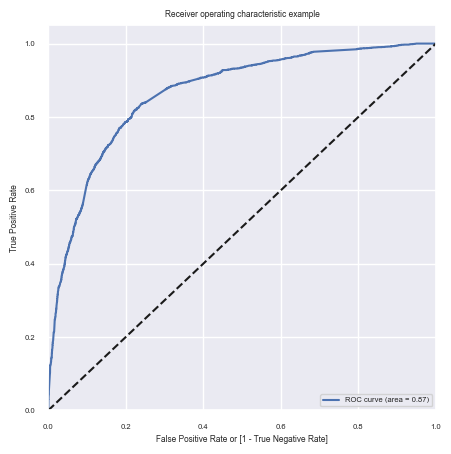

In [93]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)


#### Finding the right Cut-Off Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity



In [94]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.263941,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.263353,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.307559,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.857083,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.215999,3934,0,1,1,1,0,0,0,0,0,0,0


In [96]:
# Let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.573748  0.973236  0.327586
0.2   0.2  0.712276  0.911192  0.589705
0.3   0.3  0.790507  0.820762  0.771864
0.4   0.4  0.798237  0.755069  0.824838
0.5   0.5  0.798856  0.671533  0.877311
0.6   0.6  0.774737  0.545012  0.916292
0.7   0.7  0.758658  0.459043  0.943278
0.8   0.8  0.733612  0.355231  0.966767
0.9   0.9  0.682127  0.184509  0.988756


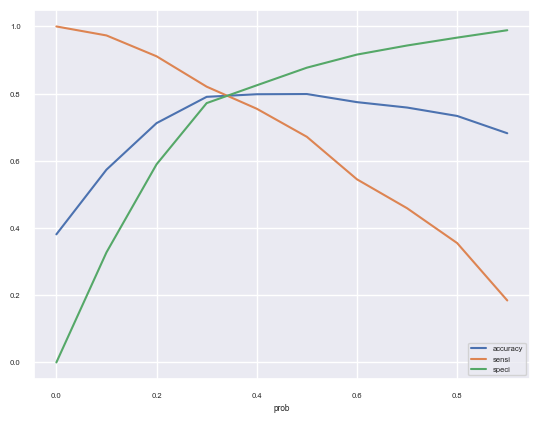

In [98]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
sns.set(font_scale=.25)
plt.show()

#### Cut-off Probability

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.263941,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.263353,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.307559,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.857083,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.215999,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [100]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)


0.7905071119356833

In [101]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3089,  913],
       [ 442, 2024]])

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [103]:
# Checking sensitivity of our logistic regression model
TP / float(TP+FN)

0.8207623682076237

In [104]:
# calculate specificity
TN / float(TN+FP)

0.771864067966017

In [105]:
# Calculate false postive rate - predicting convert when the lead does not get converted
print(FP/ float(TN+FP))

0.228135932033983


In [106]:
# Positive predictive 
print (TP / float(TP+FP))

0.6891385767790262


In [107]:
# Negative predictive
print (TN / float(TN+ FN))

0.8748229963183234


#### Checking Precision and Recall

In [109]:
y_train_pred_final.Convert, y_train_pred_final.predicted.head()


(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Convert, Length: 6468, dtype: int64,
 0    0
 1    0
 2    0
 3    1
 4    0
 Name: predicted, dtype: int64)

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

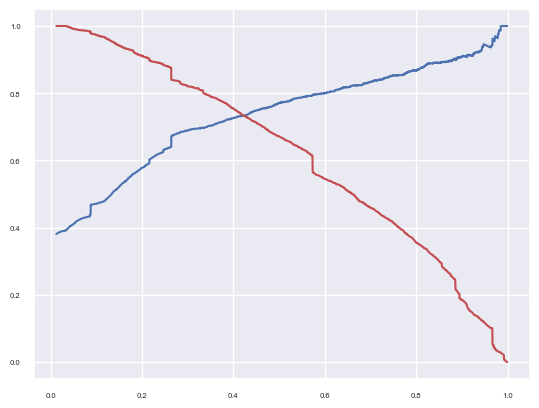

In [113]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
sns.set(font_scale=.75)
plt.show()

#### checking the model on the test data

In [114]:
scaler = StandardScaler()
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits',\
                                                                                                              'Page Views Per Visit','Total Time Spent on Website']])

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
4269,0,0.933036,0,0,0,0,0,1,0,0,0,0,0
2376,0,-0.900812,0,1,0,0,0,1,0,0,0,0,0
7766,0,-0.793792,0,0,0,0,0,0,0,0,0,0,1
9199,0,-0.900812,1,0,0,0,0,0,0,0,1,0,0
4359,0,-0.900812,0,1,0,1,0,0,1,0,0,0,0


In [115]:
X_test_sm = sm.add_constant(X_test)


In [116]:
y_test_pred = res.predict(X_test_sm)


In [117]:
y_test_pred[:10]


4269    0.788243
2376    0.965981
7766    0.416709
9199    0.086218
4359    0.883555
9186    0.626149
1631    0.499667
8963    0.183543
8007    0.065467
5324    0.403959
dtype: float64

In [118]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
y_pred_1.head()

,0
4269,0.788243
2376,0.965981
7766,0.416709
9199,0.086218
4359,0.883555


In [120]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect to index
y_test_df['Prospect ID'] = y_test_df.index

In [121]:
# Removing index for both dataframes 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [122]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [123]:
y_pred_final.head()


,Converted,Prospect ID,0
0,1,4269,0.788243
1,1,2376,0.965981
2,1,7766,0.416709
3,0,9199,0.086218
4,1,4359,0.883555


In [124]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [125]:
y_pred_final.head()


,Converted,Prospect ID,Convert_Prob
0,1,4269,0.788243
1,1,2376,0.965981
2,1,7766,0.416709
3,0,9199,0.086218
4,1,4359,0.883555


In [126]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Convert_Prob']]

In [127]:
y_pred_final.head()


,Prospect ID,Converted,Convert_Prob
0,4269,1,0.788243
1,2376,1,0.965981
2,7766,1,0.416709
3,9199,0,0.086218
4,4359,1,0.883555


In [128]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)


In [129]:
y_pred_final.head()


,Prospect ID,Converted,Convert_Prob,final_predicted
0,4269,1,0.788243,1
1,2376,1,0.965981,1
2,7766,1,0.416709,1
3,9199,0,0.086218,0
4,4359,1,0.883555,1


In [130]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8041125541125541

In [131]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1410,  267],
       [ 276,  819]])

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [133]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7479452054794521

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.8407871198568873

The accuracy score looks promising. It's at 80% for our lead generation model


## Conclusion:
The model was tested on the test data to obtain the following evaluation metrics (Test Data):

Accuracy: <b>80.41%</b>

Sensitivity: <b>74.79%</b>

Specificity: <b>84.07%</b>


As a result, the model-building exercise was successful, and the sales person will now be able to identify the leads to pursue in order to convert them at a rate of 80%. The leads can be linked to the prospect ID or leads number using the index. The threshold can be lowered if more leads need to be acquired at lower conversion rates, and vice versa.